Importing nessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('training_set.csv')
df_test = pd.read_csv('testing_set.csv')

#df = pd.merge(df_train, df_test, on='Id', how='inner')
#df

In [3]:
df = pd.concat([df_train, df_test], axis = 0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


Missing value treatment

In [4]:
for column in df_train.columns:
    if df_train[column].isna().sum() > 0:
        print(f"Column '{column}' has missing values:")

Column 'LotFrontage' has missing values:
Column 'Alley' has missing values:
Column 'MasVnrType' has missing values:
Column 'MasVnrArea' has missing values:
Column 'BsmtQual' has missing values:
Column 'BsmtCond' has missing values:
Column 'BsmtExposure' has missing values:
Column 'BsmtFinType1' has missing values:
Column 'BsmtFinType2' has missing values:
Column 'Electrical' has missing values:
Column 'FireplaceQu' has missing values:
Column 'GarageType' has missing values:
Column 'GarageYrBlt' has missing values:
Column 'GarageFinish' has missing values:
Column 'GarageQual' has missing values:
Column 'GarageCond' has missing values:
Column 'PoolQC' has missing values:
Column 'Fence' has missing values:
Column 'MiscFeature' has missing values:


In [5]:
# Categorical columns 'NA' data is valid 
# Replace 'NA' data of continouse features

from methods import catconsep
cat, con = catconsep(df_train)

In [6]:
#df_train[cat].isna().sum()

In [7]:
# Replacing all the missing data from con features

df_train[con].isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [8]:
for i in con:
    x = df_train[i].mean()
    df_train[i] = df_train[i].fillna(x)

In [9]:
df_train[con].isna().sum() # Zero missing data

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

For catgorical data

In [10]:
df_train[cat].isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [11]:
for i in cat:
    x = 'NaN'
    df_train[i] = df_train[i].fillna(x)

In [12]:
df_train[cat].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

Exploratory data Analysis

In [13]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Cheking for skew in the data

In [15]:
con.remove('SalePrice')

Skewness for 'Id': 0.0


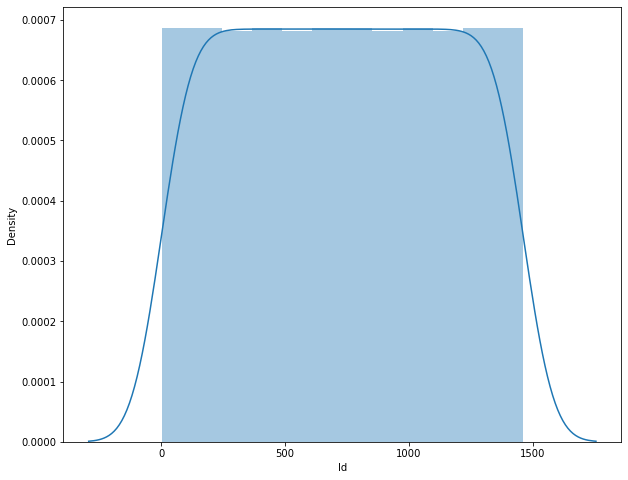

Skewness for 'MSSubClass': 1.4062101115313512


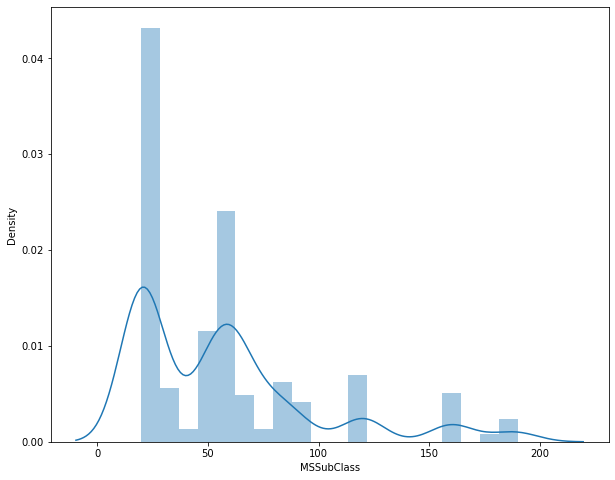

Skewness for 'LotFrontage': 2.382499177054863


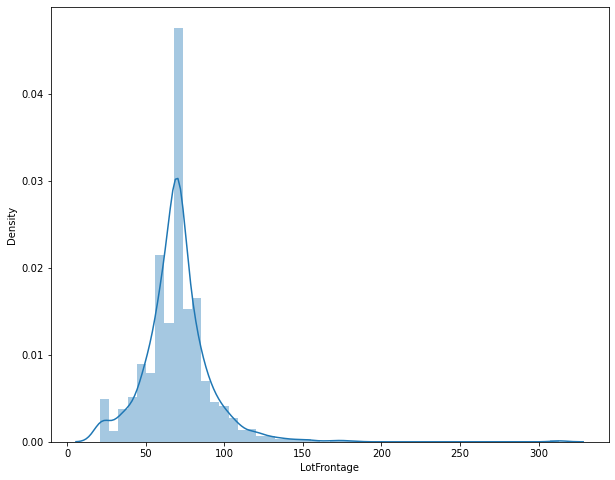

Skewness for 'LotArea': 12.195142125084478


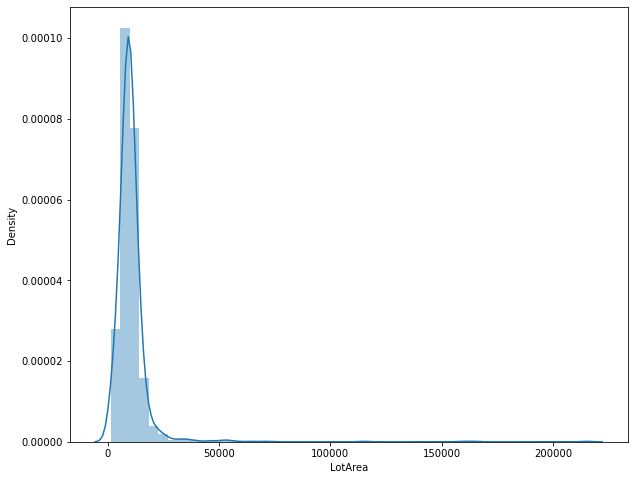

Skewness for 'OverallQual': 0.2167209765258641


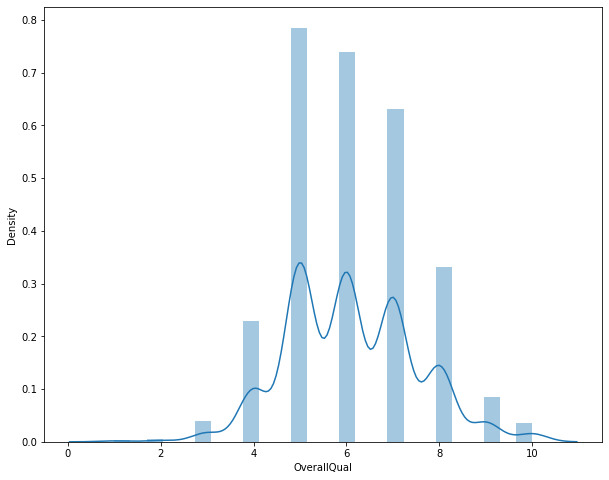

Skewness for 'OverallCond': 0.6923552135520978


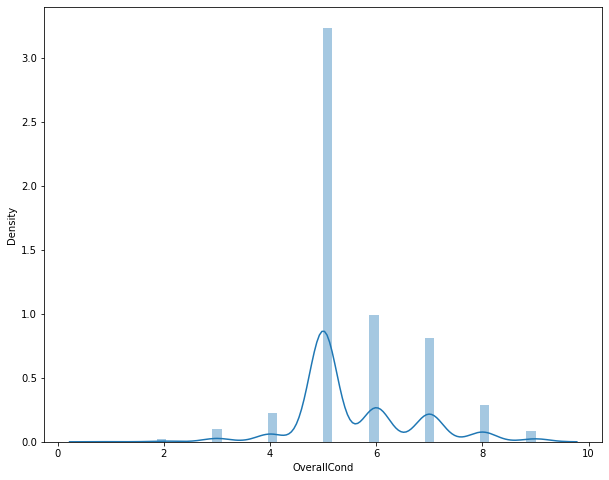

Skewness for 'YearBuilt': -0.612830724202899


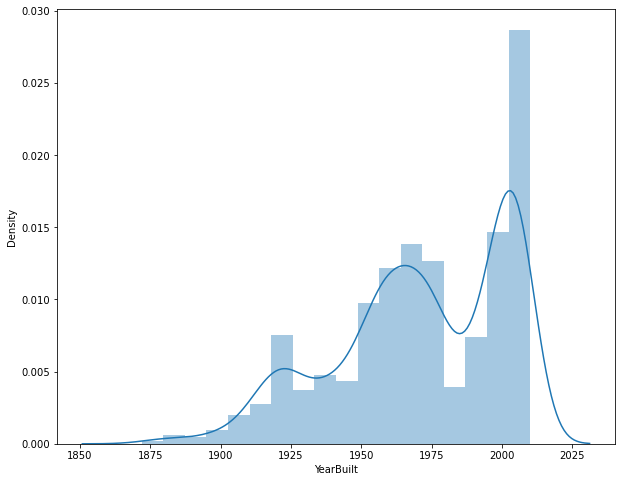

Skewness for 'YearRemodAdd': -0.5030444967597948


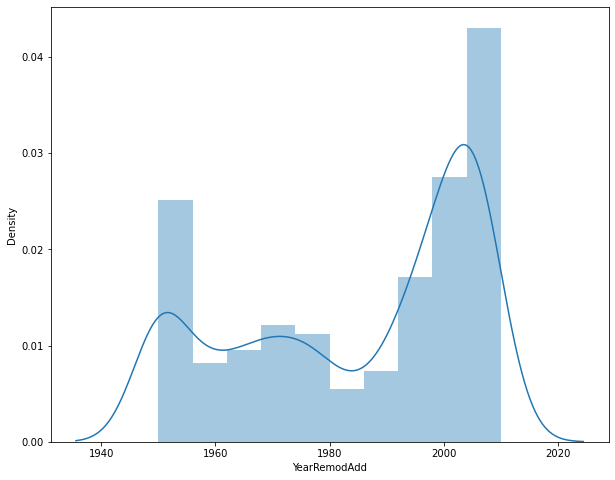

Skewness for 'MasVnrArea': 2.6736612614758912


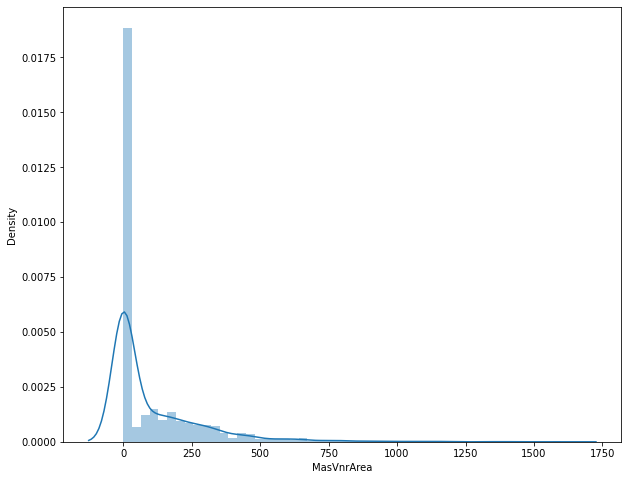

Skewness for 'BsmtFinSF1': 1.6837708962341815


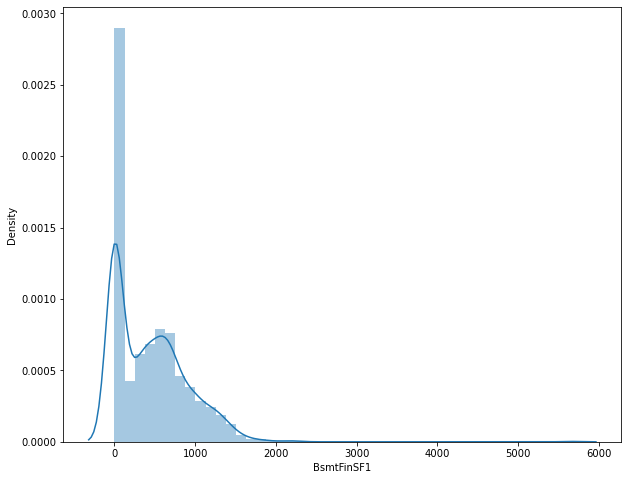

Skewness for 'BsmtFinSF2': 4.250888017057445


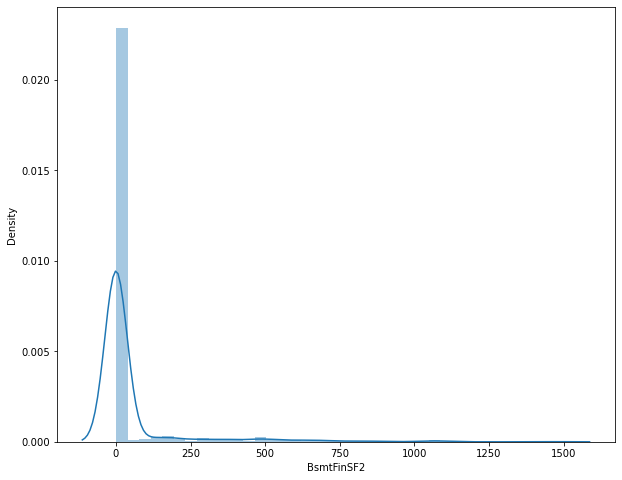

Skewness for 'BsmtUnfSF': 0.9193227015582005


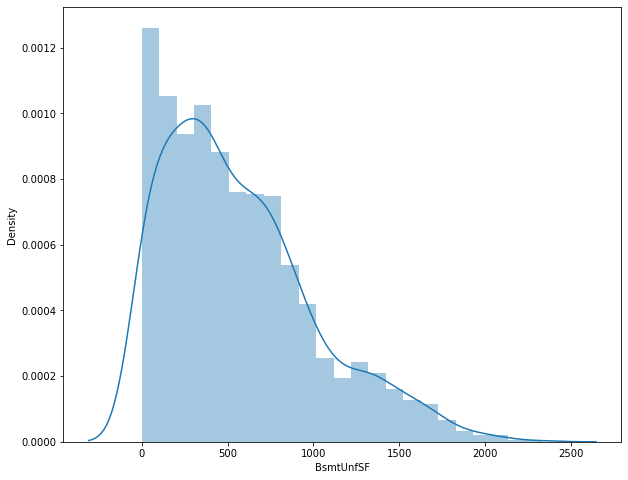

Skewness for 'TotalBsmtSF': 1.522688086978629


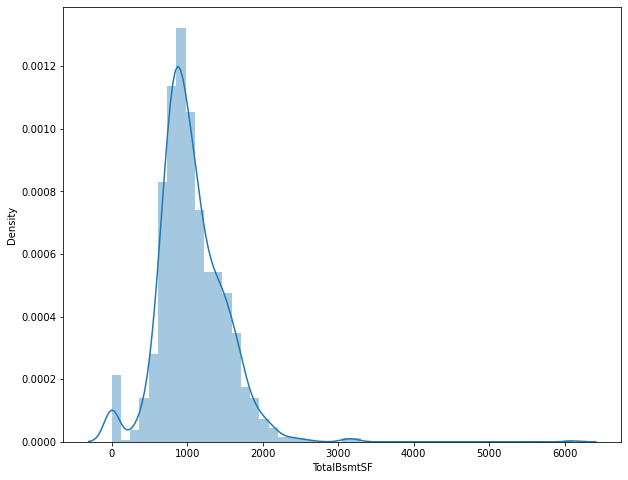

Skewness for '1stFlrSF': 1.3753417421837937


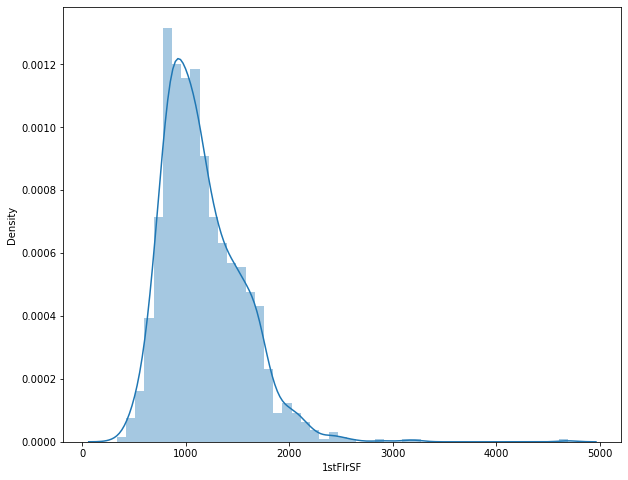

Skewness for '2ndFlrSF': 0.8121942731961613


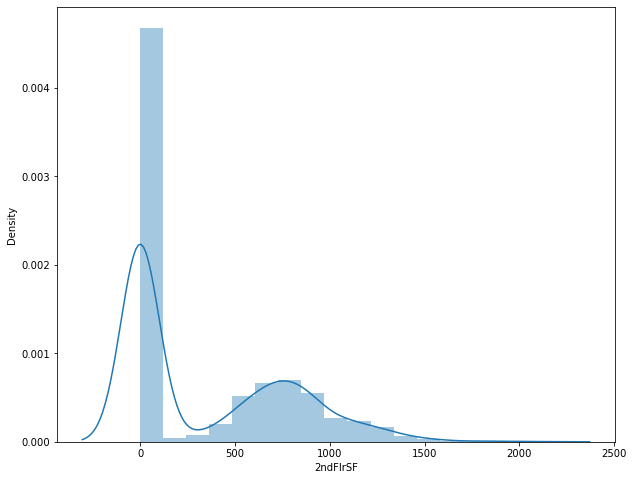

Skewness for 'LowQualFinSF': 9.002080417658552


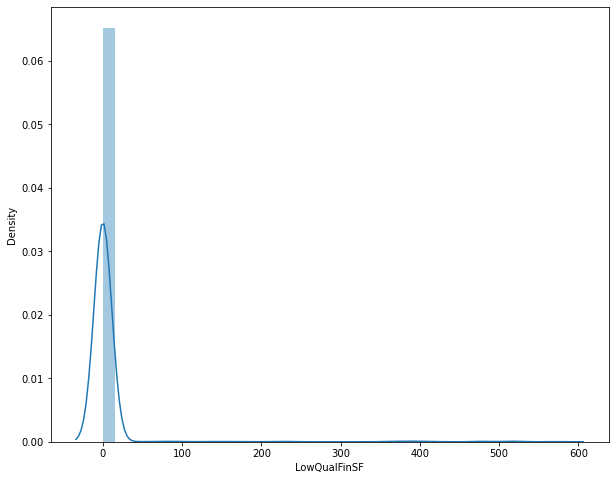

Skewness for 'GrLivArea': 1.365155954773434


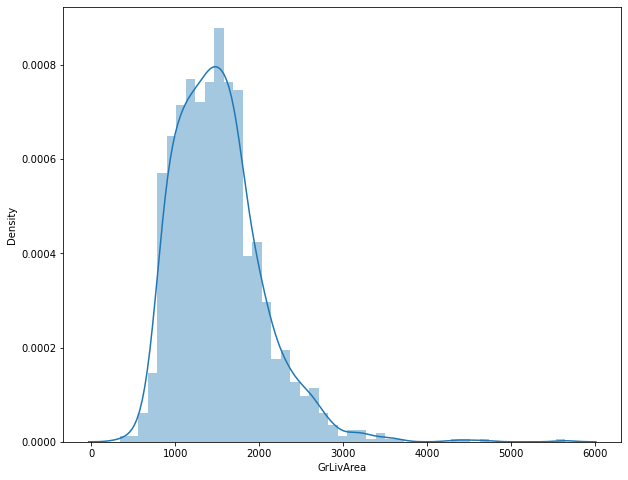

Skewness for 'BsmtFullBath': 0.5954540376067279


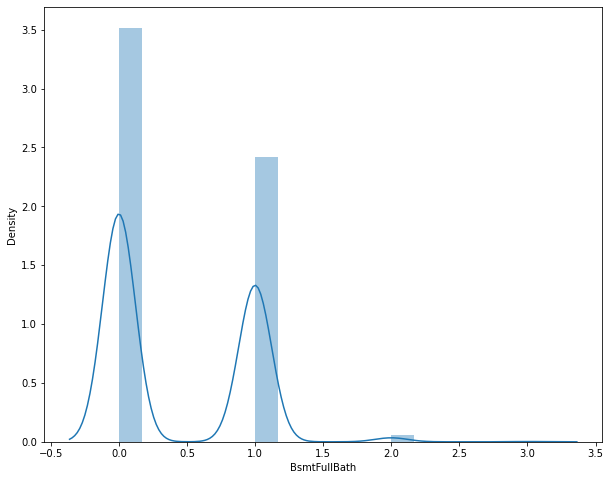

Skewness for 'BsmtHalfBath': 4.0991856695420035


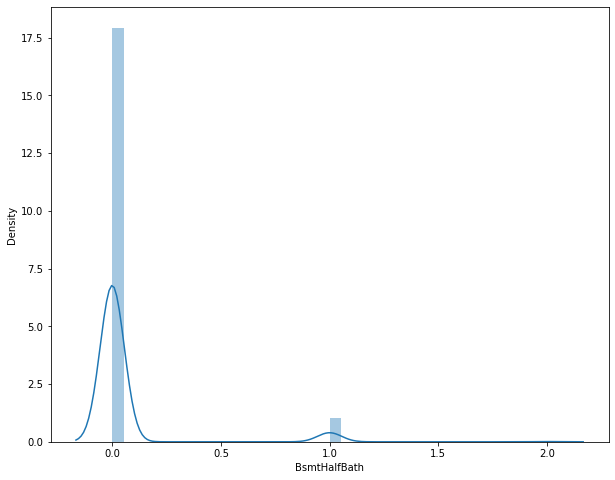

Skewness for 'FullBath': 0.0365239844325461


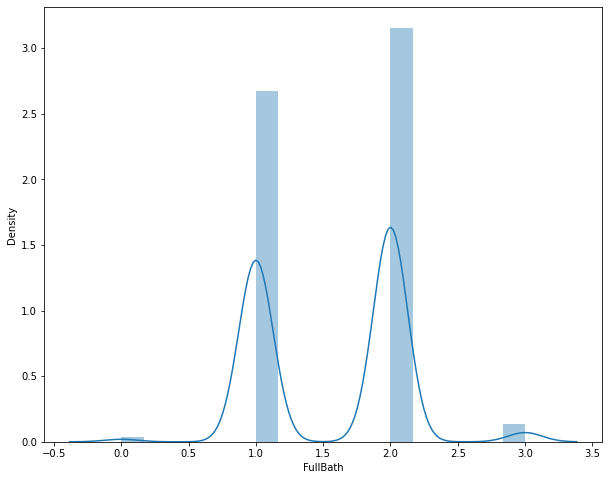

Skewness for 'HalfBath': 0.6752028347742616


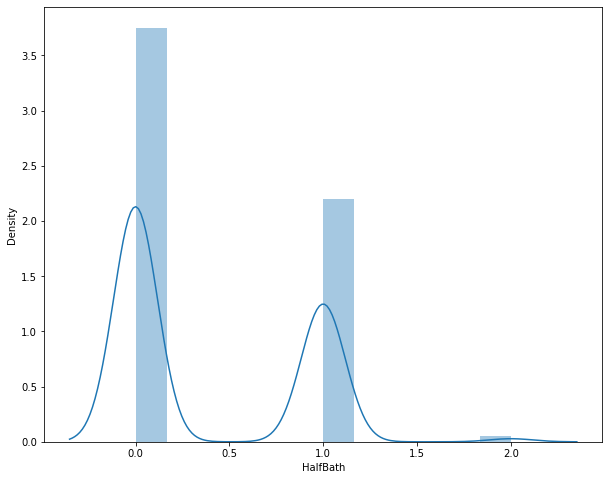

Skewness for 'BedroomAbvGr': 0.21157244158228097


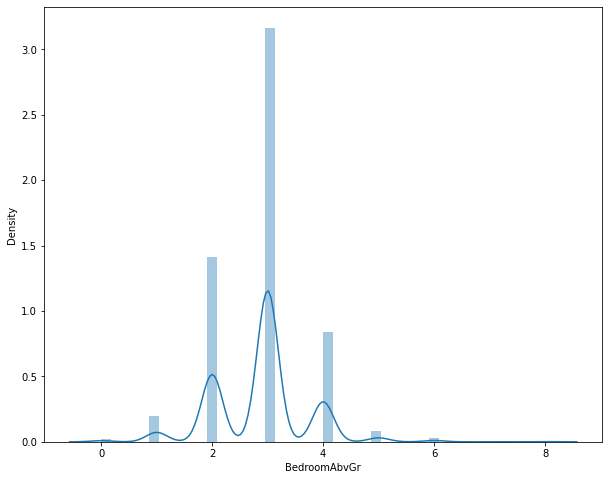

Skewness for 'KitchenAbvGr': 4.483784093860484


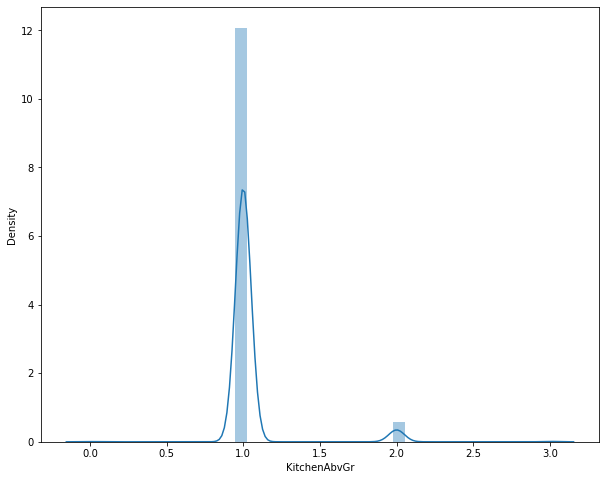

Skewness for 'TotRmsAbvGrd': 0.6756457673102017


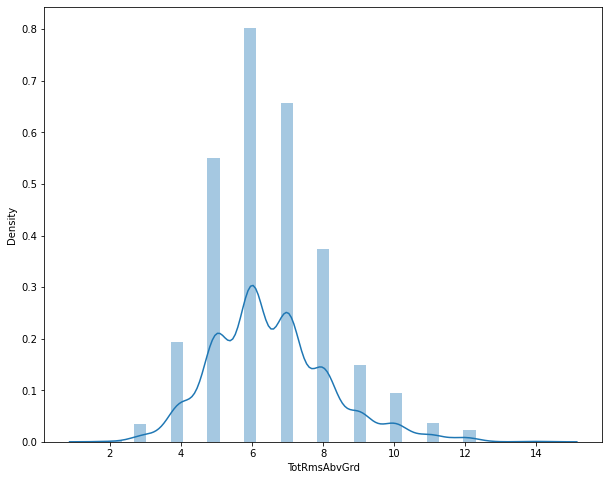

Skewness for 'Fireplaces': 0.6488976310170327


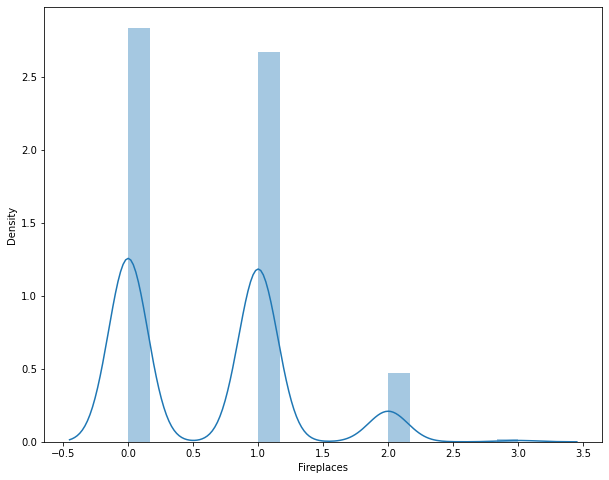

Skewness for 'GarageYrBlt': -0.6674881457666015


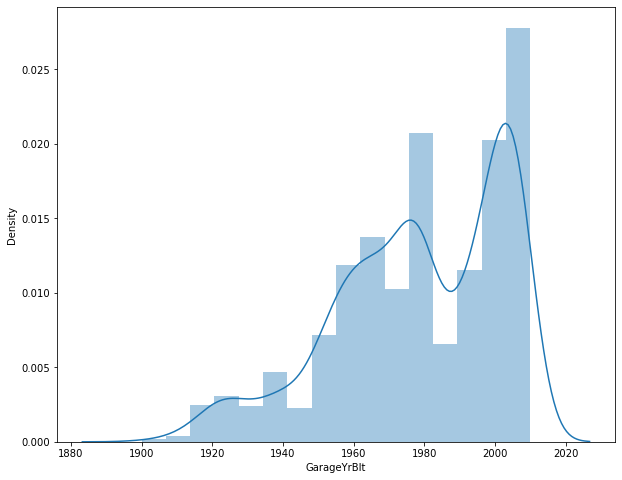

Skewness for 'GarageCars': -0.34219689543081294


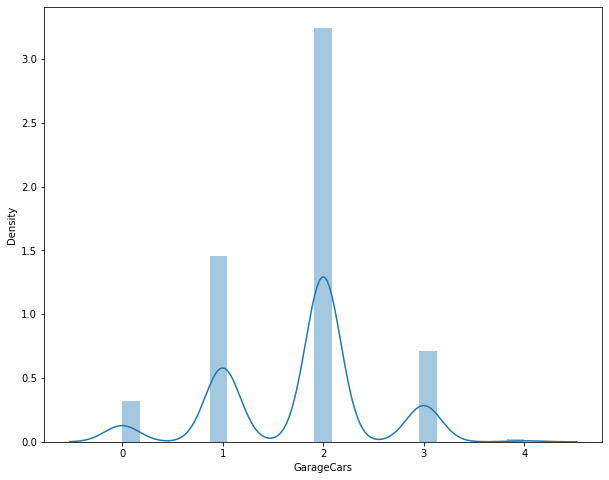

Skewness for 'GarageArea': 0.1797959420587727


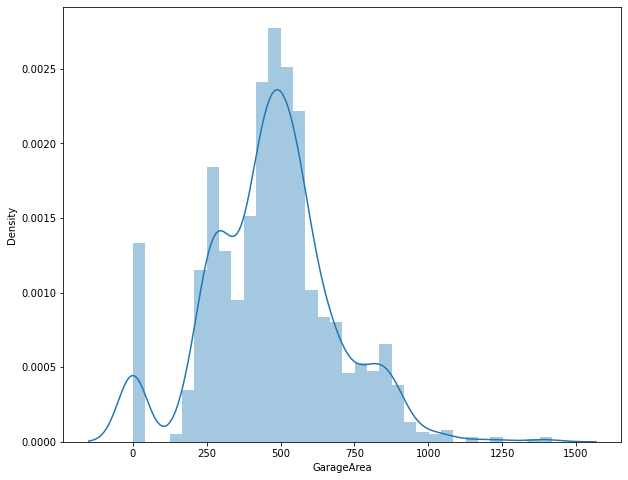

Skewness for 'WoodDeckSF': 1.5397916998042025


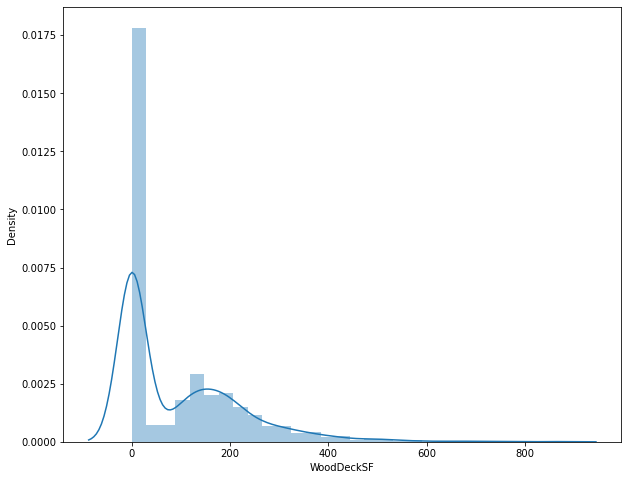

Skewness for 'OpenPorchSF': 2.361911928568972


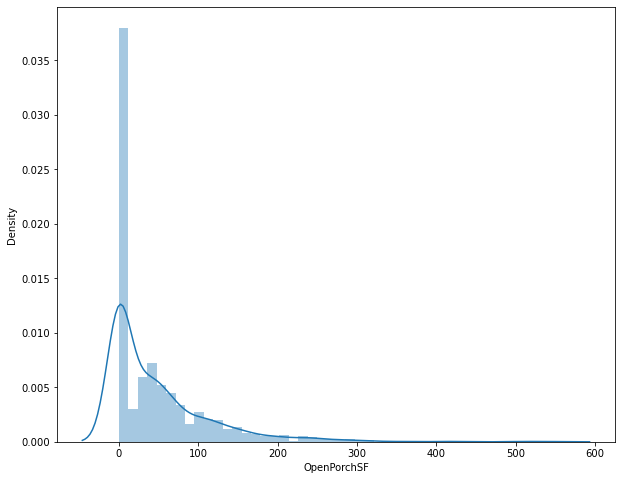

Skewness for 'EnclosedPorch': 3.086696471376678


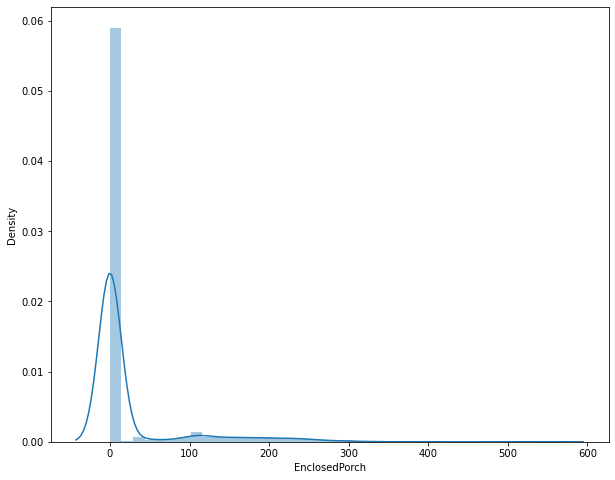

Skewness for '3SsnPorch': 10.293752357165413


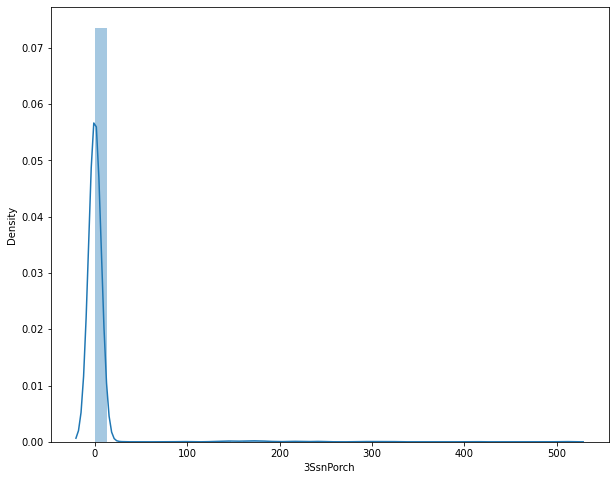

Skewness for 'ScreenPorch': 4.1179773827954875


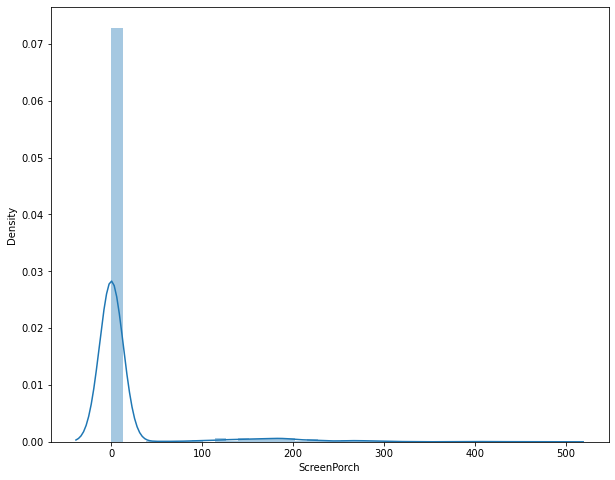

Skewness for 'PoolArea': 14.813134660429398


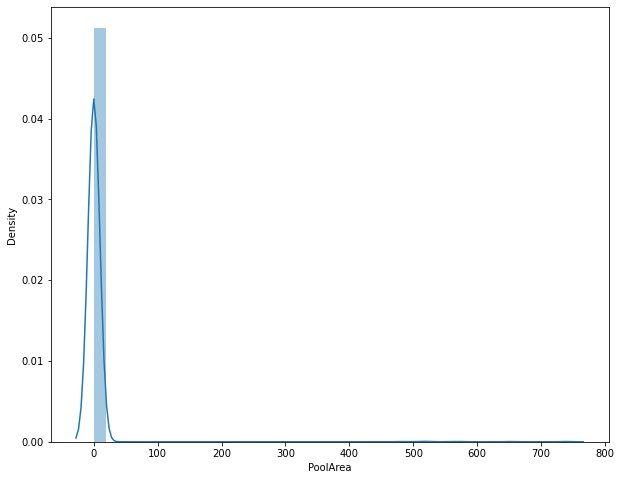

Skewness for 'MiscVal': 24.4516396173223


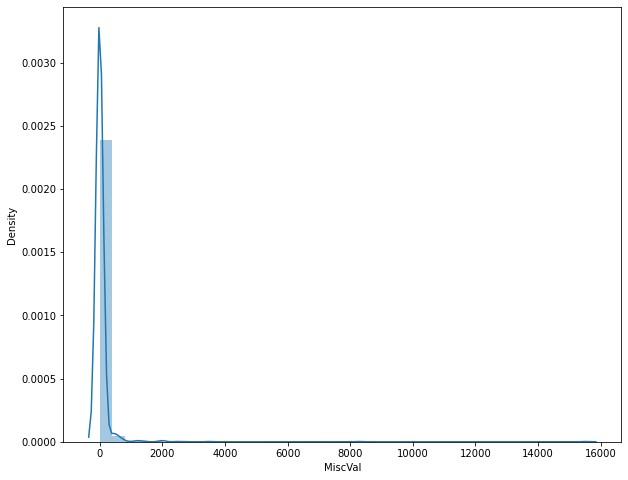

Skewness for 'MoSold': 0.2118350601903434


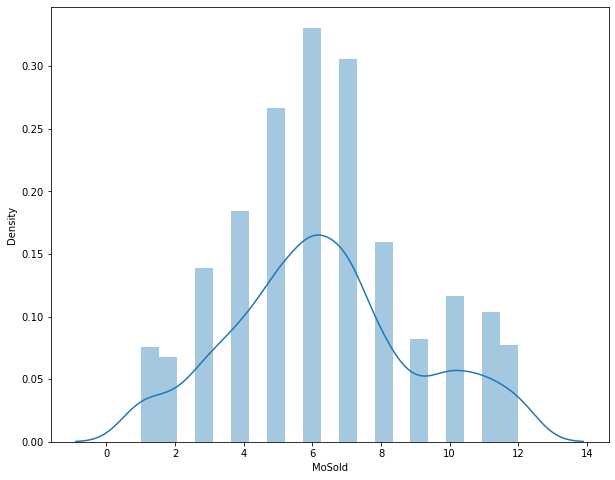

Skewness for 'YrSold': 0.096169579618143


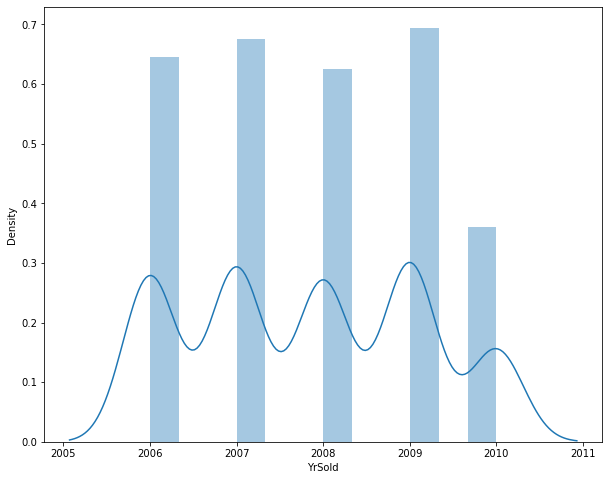

In [16]:
from scipy.stats import skew

for i in df_train[con]:
    #print(df_train[i])
    skewness = skew(df_train[i])
    print(f"Skewness for '{i}': {skewness}")
    plt.figure(figsize=(10,8))
    sns.distplot(df_train[i])
    plt.show()

In [17]:
for i in df_train[con]:
    skewness = skew(df_train[i])
    if ((skewness >= 0.75) or (skewness <= -0.75)):
        print(f"Skewness for '{i}': {skewness}")

Skewness for 'MSSubClass': 1.4062101115313512
Skewness for 'LotFrontage': 2.382499177054863
Skewness for 'LotArea': 12.195142125084478
Skewness for 'MasVnrArea': 2.6736612614758912
Skewness for 'BsmtFinSF1': 1.6837708962341815
Skewness for 'BsmtFinSF2': 4.250888017057445
Skewness for 'BsmtUnfSF': 0.9193227015582005
Skewness for 'TotalBsmtSF': 1.522688086978629
Skewness for '1stFlrSF': 1.3753417421837937
Skewness for '2ndFlrSF': 0.8121942731961613
Skewness for 'LowQualFinSF': 9.002080417658552
Skewness for 'GrLivArea': 1.365155954773434
Skewness for 'BsmtHalfBath': 4.0991856695420035
Skewness for 'KitchenAbvGr': 4.483784093860484
Skewness for 'WoodDeckSF': 1.5397916998042025
Skewness for 'OpenPorchSF': 2.361911928568972
Skewness for 'EnclosedPorch': 3.086696471376678
Skewness for '3SsnPorch': 10.293752357165413
Skewness for 'ScreenPorch': 4.1179773827954875
Skewness for 'PoolArea': 14.813134660429398
Skewness for 'MiscVal': 24.4516396173223


In [18]:
for i in df_train[con]:  #code to remove skew value by sqrt function
    skewness = skew(df_train[i])
    if ((skewness >= 0.75) or (skewness <= -0.75)):
        df_train[i] = np.sqrt(df_train[i])

<AxesSubplot:>

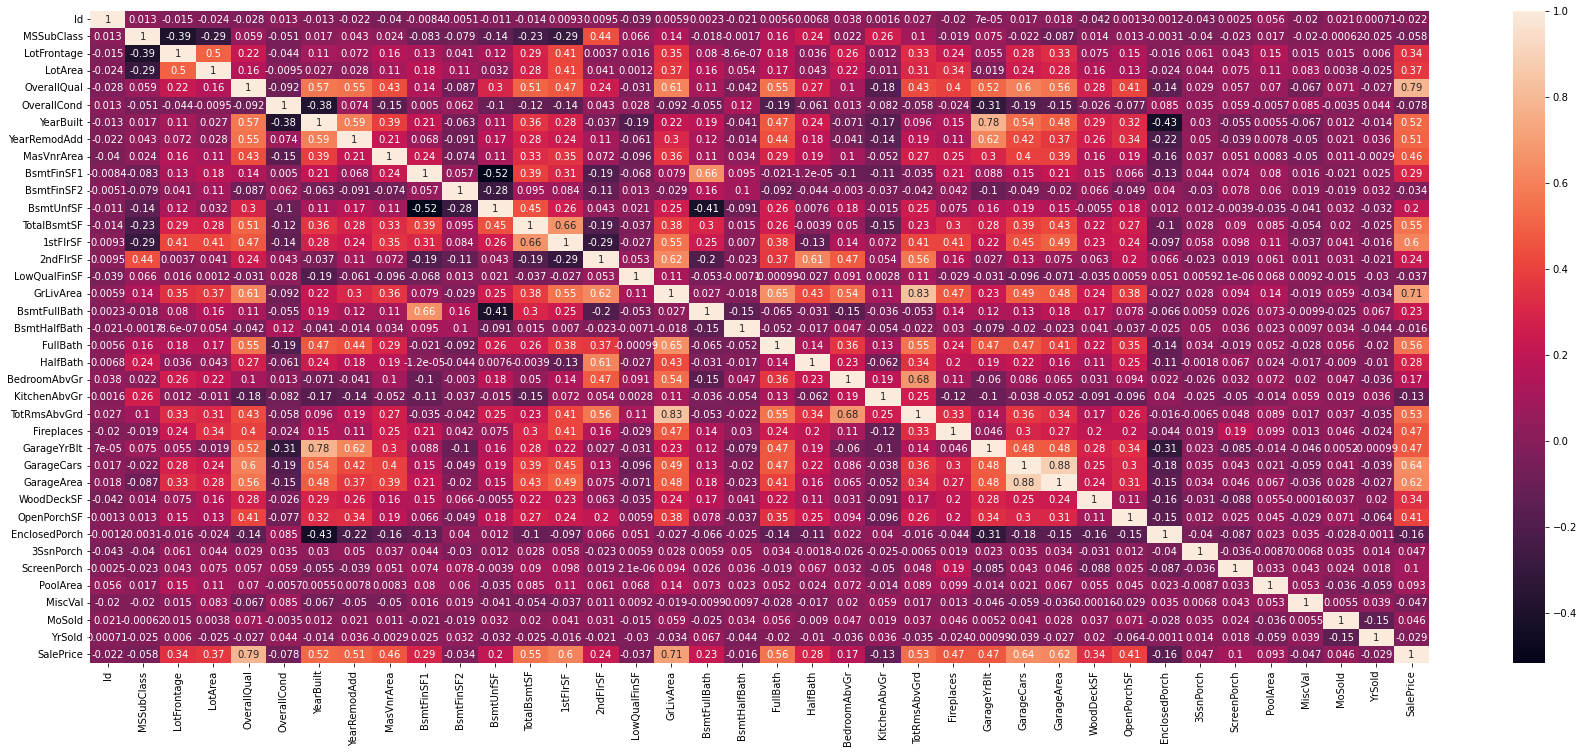

In [19]:
plt.figure(figsize=(30,12))

sns.heatmap(df_train.corr(), annot=True)

In [20]:
df_train.corr()['SalePrice'].sort_values()

EnclosedPorch   -0.160073
KitchenAbvGr    -0.128729
OverallCond     -0.077856
MSSubClass      -0.057551
MiscVal         -0.046692
LowQualFinSF    -0.036704
BsmtFinSF2      -0.034474
YrSold          -0.028923
Id              -0.021917
BsmtHalfBath    -0.016380
MoSold           0.046432
3SsnPorch        0.047392
PoolArea         0.093411
ScreenPorch      0.102438
BedroomAbvGr     0.168213
BsmtUnfSF        0.201428
BsmtFullBath     0.227122
2ndFlrSF         0.235201
HalfBath         0.284108
BsmtFinSF1       0.293820
WoodDeckSF       0.336822
LotFrontage      0.342883
LotArea          0.366675
OpenPorchSF      0.406955
MasVnrArea       0.461109
Fireplaces       0.466929
GarageYrBlt      0.470177
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
TotalBsmtSF      0.554747
FullBath         0.560664
1stFlrSF         0.604609
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708765
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

In [21]:
#Removing all low corelation values 
X = df_train.drop(['KitchenAbvGr','EnclosedPorch','MSSubClass','OverallCond','YrSold','LowQualFinSF','Id','MiscVal','BsmtHalfBath','BsmtFinSF2','3SsnPorch','MoSold','PoolArea'], axis =1 )
Y= df_train[['SalePrice']]

In [22]:
from methods import preprocessing

Xnew = preprocessing(X)
#Xnew is standardized 

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew, Y, test_size=0.2, random_state= 31)

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [25]:
lin_reg.fit(xtrain, ytrain)

LinearRegression()

Accuracy

In [26]:
lin_reg.score(xtest, ytest)

0.999999999850401

Testing accuracy

In [27]:
y_pred = lin_reg.predict(xtest)

In [28]:
from sklearn.metrics import r2_score

r2_score(ytest, y_pred)

0.999999999850401

Training accuracy

In [29]:
y_pred_t = lin_reg.predict(xtrain)
r2_score(ytrain, y_pred_t)

1.0

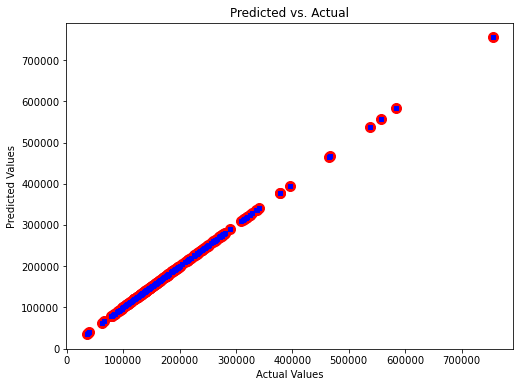

In [30]:
plt.figure(figsize=(8, 6))

# Plot actual values in blue
plt.scatter(ytest, ytest ,color='red', label='Actual', s= 100)

# Plot predicted values in red
plt.scatter(y_pred, y_pred, color='blue', label='Predicted', s = 20, marker= 's')

plt.title("Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Overfitting,Underfitting check

In [31]:
from sklearn.metrics import mean_squared_error
testing_MSE = mean_squared_error(ytest, y_pred)
testing_MSE

1.1285805840493657

In [32]:
training_MSE=mean_squared_error(ytrain, y_pred_t)
training_MSE

8.772773899471433e-20

This indicates that is model is Overfitted 

In [33]:
from sklearn.model_selection import learning_curve

In [34]:
train_sizes, train_scores, test_scores = learning_curve(lin_reg, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')

train_mse = -train_scores.mean(axis=1)
test_mse = -test_scores.mean(axis=1)

#train_mean = np.mean(train_scores, axis=1)
#test_mean = np.mean(test_scores, axis=1)

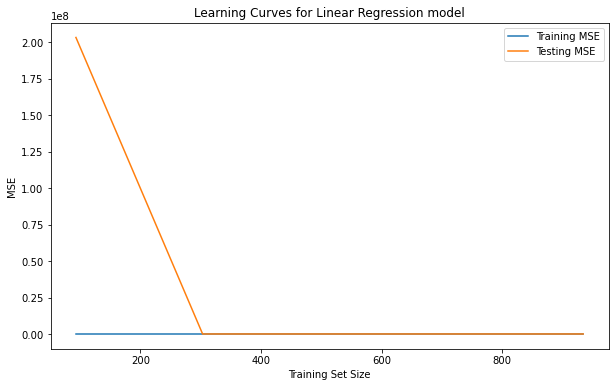

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse, label='Training MSE')
plt.plot(train_sizes, test_mse, label='Testing MSE')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curves for Linear Regression model')
plt.show()

Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

lass_reg = Lasso(alpha=70, max_iter=100, tol=0.1)
lass_reg.fit(xtrain, ytrain)

Lasso(alpha=70, max_iter=100, tol=0.1)

In [37]:
lass_reg.score(xtest,ytest)

0.830248781942564

In [38]:
lass_reg.score(xtrain, ytrain)

0.8998073275567388

In [50]:
train_sizes, train_scores, test_scores = learning_curve(lass_reg, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')

train_mse = -train_scores.mean(axis=1)
test_mse = -test_scores.mean(axis=1)

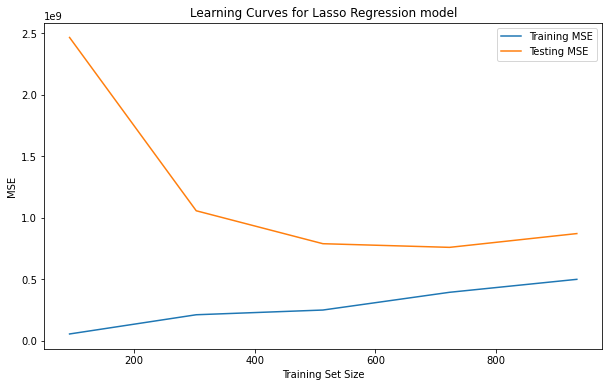

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse, label='Training MSE')
plt.plot(train_sizes, test_mse, label='Testing MSE')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curves for Lasso Regression model')
plt.show()

In [39]:
#model is free from overfitting

Ridge Regression

In [40]:
from sklearn.linear_model import Ridge

rid_reg =Ridge(alpha=50, max_iter=100, tol=0.1)
rid_reg.fit(xtrain, ytrain)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [41]:
rid_reg.score(xtest,ytest)

0.9889727935682526

In [42]:
rid_reg.score(xtrain,ytrain)

0.9930556649763751

In [53]:
train_sizes, train_scores, test_scores = learning_curve(rid_reg, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')

train_mse = -train_scores.mean(axis=1)
test_mse = -test_scores.mean(axis=1)

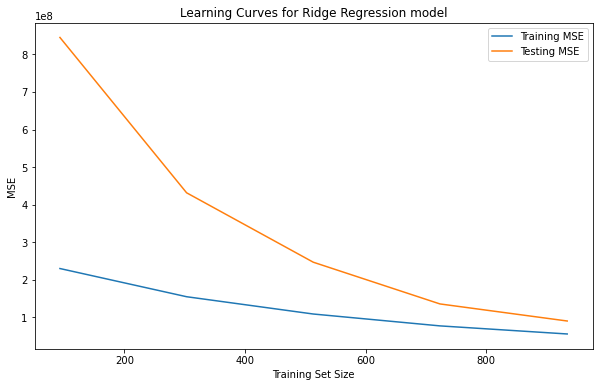

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse, label='Training MSE')
plt.plot(train_sizes, test_mse, label='Testing MSE')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.title('Learning Curves for Ridge Regression model')
plt.show()

Using GridsearchCV to find best alpha value

In [43]:
from sklearn.model_selection import GridSearchCV
grid_values ={"alpha":[50,60,70,80,90 ,100]}

ridge_grid = GridSearchCV(estimator=rid_reg, param_grid=grid_values, cv = 5 )
ridge_grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(alpha=50, max_iter=100, tol=0.1),
             param_grid={'alpha': [50, 60, 70, 80, 90, 100]})

In [44]:
lasso_grid = GridSearchCV(estimator=lass_reg, param_grid=grid_values, cv = 5 )
lasso_grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(alpha=70, max_iter=100, tol=0.1),
             param_grid={'alpha': [50, 60, 70, 80, 90, 100]})

In [45]:
ridge_grid.best_params_['alpha']

50

In [55]:
best_model_ridge=ridge_grid.best_estimator_
best_model_ridge

Ridge(alpha=50, max_iter=100, tol=0.1)

In [47]:
lasso_grid.best_params_['alpha']

100

In [48]:
best_model_lasso= lasso_grid.best_estimator_
best_model_lasso

Lasso(alpha=100, max_iter=100, tol=0.1)

MSE of Ridge

In [56]:
y_pred_ridge = best_model_ridge.predict(xtest)
mean_squared_error(ytest,y_pred_ridge)

83189656.83138257

In [57]:
y_pred_ridge = best_model_ridge.predict(xtrain)
mean_squared_error(ytrain,y_pred_ridge)

41594651.32664248

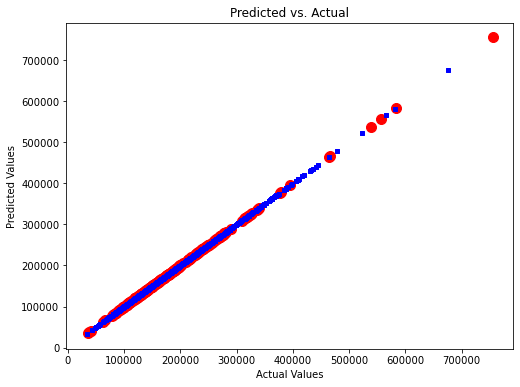

In [58]:
plt.figure(figsize=(8, 6))

# Plot actual values in blue
plt.scatter(ytest, ytest ,color='red', label='Actual', s= 100)

# Plot predicted values in red
plt.scatter(y_pred_ridge, y_pred_ridge, color='blue', label='Predicted', s = 20, marker= 's')

plt.title("Predicted vs. Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

MSE of Lasso

In [59]:
y_pred_lasso = best_model_lasso.predict(xtest)
mean_squared_error(ytest,y_pred_lasso)

1229589325.4814065

In [60]:
y_pred_lasso = best_model_lasso.predict(xtrain)
mean_squared_error(ytrain,y_pred_lasso)

614350497.9908094

In conclusion Both Ridge and lasso help in reducing the overfitting nature of previous model. But Ridge regression is better off in equalizing the training and testing errors

In [61]:
Id = df_train[['Id']]
Id = Id.iloc[:1168, :]
Id.shape

(1168, 1)

In [62]:
Pred = best_model_ridge.predict(xtrain)
Pred.shape

(1168, 1)

In [63]:
Pred = pd.DataFrame(Pred)

In [64]:
Final = pd.concat([Id, Pred], axis=1)

In [65]:
Final.columns = ['ID', 'Predicted SalePrice']

In [ ]:
path = 'Submission.csv'
Final.to_csv(path, index = False)